In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pneumonia-capstone-cnn/__results__.html
/kaggle/input/pneumonia-capstone-cnn/__notebook__.ipynb
/kaggle/input/pneumonia-capstone-cnn/custom.css
/kaggle/input/pneumonia-capstone-cnn/__output__.json
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_sample_submission.csv
/kaggle/input/rsna-pneumonia-detection-challenge/GCP Credits Request Link - RSNA.txt
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/d58a922b-97c8-4ee8-ad84-1c4c6c883c86.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/a2018dbd-1979-452a-a629-b5230b69d259.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/e22e763f-0b4d-408c-94ca-2d0d740a4bb4.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6fa98716-9ba4-479d-bd41-332cafed8a05.dcm
/kaggle/input/rsna-pneumon

In [2]:
import os
__print__ = print
def print(string):
    os.system(f'echo \"{string}\"')
    __print__(string)

In [3]:
ls

__notebook__.ipynb


Problem Statement:

Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli.

Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

Business Domain Value Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology).

Project objective In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image.

In [4]:
#Importing all the standard libraries
#..... array/martrix operations and dataframe libraries
import numpy as np
import pandas as pd
#...........
#.......... Visulaization libraries
import pydicom
import pylab
import matplotlib.pyplot as plt
import seaborn as sn
from skimage.transform import resize

#......
from sklearn.model_selection import train_test_split

# NN model building linraries
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau
#...................................................

Using TensorFlow backend.


In [5]:
# setting path for each of the files
class_path='/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv'
labels_path='/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv'
Image_train_path='/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/'

In [6]:
# Files descrition
#1. stage_2_detailed_class_info.csv- contains the information of target label
#2. stage_2_train_labels.csv- contains information on Target and bounding box
#3. stage_2_train_images- contains training images in dcm format

In [7]:
# Reading class file (first file) as dataframe and check few entries and shape
df_class=pd.read_csv(class_path)
print(df_class.head(10))
print(df_class.shape[0])

                              patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
5  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
6  00569f44-917d-4c86-a842-81832af98c30  No Lung Opacity / Not Normal
7  006cec2e-6ce2-4549-bffa-eadfcd1e9970  No Lung Opacity / Not Normal
8  00704310-78a8-4b38-8475-49f4573b2dbb                  Lung Opacity
9  00704310-78a8-4b38-8475-49f4573b2dbb                  Lung Opacity
30227


In [8]:
df_class['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [9]:
#Observation:
# This file ocntains patient Id and repective class ifnormation. 
#. There are 30277 records
# There are three classes- 
#    1. Lung Opacity- Patient havinig pneumonia, 
#    2. Normal- Patient not having pnemonia and not having any other lung problem
#    3. No Lung Opacity/Not Normal- Patient not having pnemonia but having any other lung problem

In [10]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


#Observation- There are no null values

In [11]:
# checking the number of unique entries with respect to patient ID
print(df_class['patientId'].value_counts().shape[0],'patient cases')

TypeError: print() takes 1 positional argument but 2 were given

In [12]:
# # Reading label file (second file) as dataframe and check few entries and shape
df_label=pd.read_csv(labels_path)
print(df_label.head())
print(df_label.shape)

                              patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
(30227, 6)


# Observation
#1. There are 30277 lables record (same as the class dataframe)
#2. There are 6 columns - pateint ID (same as order as in class dataframe), bounding box co-ordinates, height and widht and Target label

In [13]:
# Now lets drop the duplicate cases
df=pd.concat([df_label,df_class.drop('patientId',1)],1)
print(df.shape)
print(df.head())

(30227, 7)
                              patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity  


In [14]:
# Classes and Targets based on Patient count
df.groupby(['class','Target']).size().reset_index(name='patient_numbers')

class  Target  patient_numbers
0                  Lung Opacity       1             9555
1  No Lung Opacity / Not Normal       0            11821
2                        Normal       0             8851

In [15]:
print('Number of duplicate entries accross rows:\n', df[df.duplicated()].count())
print('Number of duplicate Patient Id entries :\n', df[df.duplicated(subset='patientId')].count())
print('Number of unique Patient Id entries: \n', df['patientId'].nunique())
print('Count of various classes: \n',df.groupby('class')['patientId'].nunique())

TypeError: print() takes 1 positional argument but 2 were given

In [16]:
# Observation
#1. All the Normal and No Lung Opacity / Not Normal	patients are grouped under Target label 0 (no pnemonia)
#2. Data Imabalance- there are ~30% pneumonia records and rest ~70% no pneumonia
#3  There are no duplicates accross rows
#4. Checking for duplicate patientId's, there are 26684 unique Patient Ids

#--------------------------------------- Exploring training images data -------------------

In [17]:
# chekcing the type of image file format and total number of images
image_path='/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/'
print(os.listdir(image_path)[0])
import glob
print(len(list(glob.iglob("/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/*.dcm", recursive=True))))

d58a922b-97c8-4ee8-ad84-1c4c6c883c86.dcm
26684


#Observations:
# All the images are in dcm format 
# these image file saved in the Digital Imaging and Communications in Medicine (DICOM) image format. 
#It stores a medical image, such as a CT scan or ultrasound
# There are in total 26684 images which matches with the unique patient IDs. Seems there is no missing image file

In [18]:
# Checking sample image file for first entry in dataframe which is normal case
print(df.iloc[3])
patientId = df['patientId'][3]
image_path_1='/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/%s.dcm' %patientId
dcm_data=pydicom.read_file(image_path_1)
print(dcm_data)

patientId    003d8fa0-6bf1-40ed-b54c-ac657f8495c5
x                                             NaN
y                                             NaN
width                                         NaN
height                                        NaN
Target                                          0
class                                      Normal
Name: 3, dtype: object
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.2293.1517874295.733882
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103

#Observations:
# dcm file contains metadata information about Patient (sample with no pnemonia): 
#             name, ID, Age, Sex, body part examines, view position, pixel data of image

In [19]:
#size of image
dcm_data.pixel_array.shape

(1024, 1024)

#observations:
#1. All the 26684 images have same size of 1024 X 1024

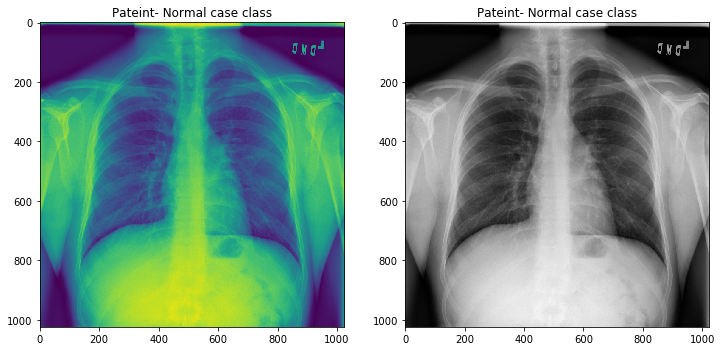

In [20]:
#Plotting the image 
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.title('Pateint- Normal case class')
plt.imshow(dcm_data.pixel_array)
plt.subplot(122)
plt.title('Pateint- Normal case class')
plt.imshow(dcm_data.pixel_array,cmap=plt.cm.gist_gray)

patientId    0004cfab-14fd-4e49-80ba-63a80b6bddd6
x                                             NaN
y                                             NaN
width                                         NaN
height                                        NaN
Target                                          0
class                No Lung Opacity / Not Normal
Name: 0, dtype: object
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 10

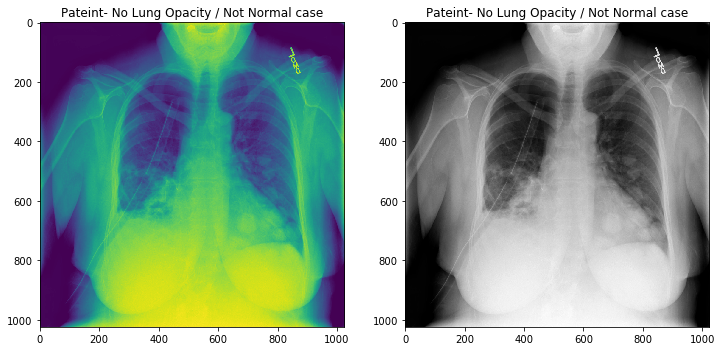

In [21]:
#... Sample No Lung Opacity / Not Normal case ----------------
print(df.iloc[0])
patientId = df['patientId'][0]
image_path_1='/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/%s.dcm' %patientId
dcm_data=pydicom.read_file(image_path_1)
print(dcm_data)

#Plotting the image 
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.title('Pateint- No Lung Opacity / Not Normal case')
plt.imshow(dcm_data.pixel_array)
plt.subplot(122)
plt.title('Pateint- No Lung Opacity / Not Normal case')
plt.imshow(dcm_data.pixel_array,cmap=plt.cm.gist_gray)

patientId    00436515-870c-4b36-a041-de91049b9ab4
x                                             264
y                                             152
width                                         213
height                                        379
Target                                          1
class                                Lung Opacity
Name: 4, dtype: object
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103

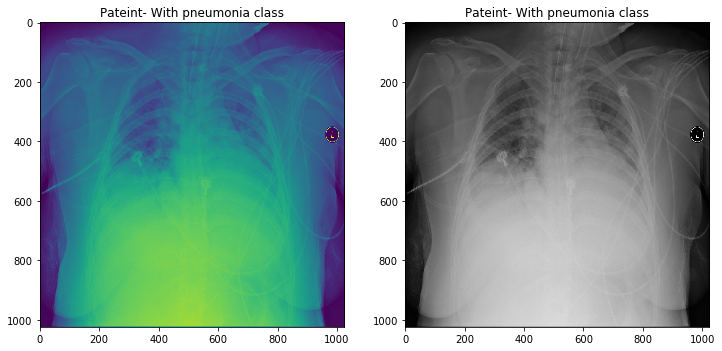

In [22]:
# Lets us plot one Patient with pnemonia (Target = 1)
print(df.iloc[4])
patientId = df['patientId'][4]
image_path_1='/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/%s.dcm' %patientId
dcm_data=pydicom.read_file(image_path_1)
print(dcm_data)
#Plotting the image 
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.title('Pateint- With pneumonia class')
plt.imshow(dcm_data.pixel_array)
plt.subplot(122)
plt.title('Pateint- With pneumonia class')
plt.imshow(dcm_data.pixel_array,cmap=plt.cm.gist_gray)

In [23]:
# Function to show to a sample image with overlayed bounding box 
def showImage(row):
    """
    Method to draw single patient with bounding box(es) if present 

    """
    # --- Open DICOM file
    imagePath = "/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/{0}.dcm".format(row['patientId'])
    d = pydicom.read_file(imagePath)
    image = d.pixel_array
    image = np.stack([image] * 3, axis=2)

    if row['Target'] == 1:        
        image = drawbox(image=image, row=row)

    plt.imshow(image, cmap=plt.cm.gist_gray)
    
    
def drawbox(image, row):
    color = np.floor(np.random.rand(3) * 256).astype('int')
    stroke=6
  
    # --- Extract coordinates
    x1 = int(row['x'])
    y1 = int(row['y'])
    y2 = y1 + int(row['height'])
    x2 = x1 + int(row['width'])
    
    #print(x1)
    #print(x2)
    #print(y1)
    #print(y2)
    
    image[y1:y1 + stroke, x1:x2] = color
    image[y2:y2 + stroke, x1:x2] = color
    image[y1:y2, x1:x1 + stroke] = color
    image[y1:y2, x2:x2 + stroke] = color

    return image

Path : stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm
Target : 1


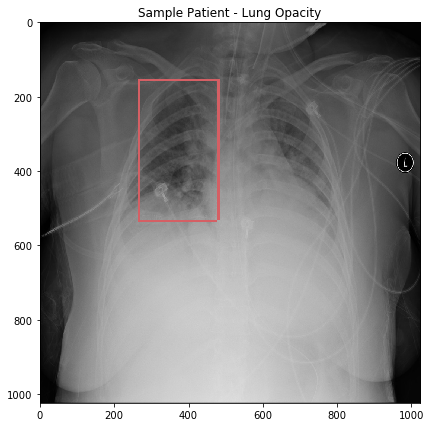

In [24]:
#patient = labels_w_class.iloc[[10]]
patient = list(df.T.to_dict().values())[4]
print("Path : stage_2_train_images/{0}.dcm".format(patient['patientId']))
print("Target : {0}".format(patient['Target']))

plt.figure(figsize=(7,7))
plt.title("Sample Patient - Lung Opacity")
showImage(patient)

#----------------------------------------- Data generation for training, Model Building and training model-----

In [25]:
# Function to collect three major information (Patient ID, box and corresponding image file path) into a dictonary called parsed
extract_boxes=lambda row: [ row['y'], row['x'], row ['height'], row['width']]
parsed={}
for n, row in df.iterrows():
    pid=row['patientId']
    if pid not in parsed:
        parsed[pid]={
            'dicom': '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/%s.dcm' % pid,
            'label': row['Target'],
            'boxes':[]
            }
                 
    if parsed[pid]['label']==1:
        parsed[pid]['boxes'].append(extract_boxes(row))

In [26]:
len(parsed)

26684

In [27]:
parsed[df['patientId'][7]]

{'dicom': '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/006cec2e-6ce2-4549-bffa-eadfcd1e9970.dcm',
 'label': 0,
 'boxes': []}

In [28]:
#............ function to get the images with bounbding box for any given Patient ID
def draw(data):
#    """
#    Method to draw single patient with bounding box(es) if present 

#   """
    # --- Open DICOM file
    d = pydicom.read_file(data['dicom'])
    im = d.pixel_array

    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)

    # --- Add boxes with random color if present
    for box in data['boxes']:
        rgb = np.floor(np.random.rand(3) * 256).astype('int')
        im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)

    pylab.imshow(im, cmap=pylab.cm.gist_gray)
    pylab.axis('off')

def overlay_box(im, box, rgb, stroke=1):
    """
    Method to overlay single box on image

    """
    # --- Convert coordinates to integers
    box = [int(b) for b in box]
    
    # --- Extract coordinates
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width

    im[y1:y1 + stroke, x1:x2] = rgb
    im[y2:y2 + stroke, x1:x2] = rgb
    im[y1:y2, x1:x1 + stroke] = rgb
    im[y1:y2, x2:x2 + stroke] = rgb

    return im

patientId    00436515-870c-4b36-a041-de91049b9ab4
x                                             264
y                                             152
width                                         213
height                                        379
Target                                          1
class                                Lung Opacity
Name: 4, dtype: object


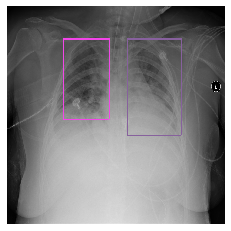

In [29]:
# overalaping bounding box with image for sample pnemonia case
#Plotting the image 
print(df.iloc[4])
patientId = df['patientId'][4]
draw(parsed[patientId])

In [30]:
import csv
# empty dictionary
pneumonia_locations = {}
# load table
with open(os.path.join(labels_path), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [31]:
len(pneumonia_locations)

6012

In [32]:
# load and shuffle filenames
folder = Image_train_path
filenames = os.listdir(folder)

#valid_filenames= os.listdir(folder)

In [33]:
from skimage.transform import resize
import keras
import random
class generator(keras.utils.Sequence):
    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [34]:
def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    #residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

import tensorflow as tf
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)

BATCH_SIZE = 16 * strategy.num_replicas_in_sync

In [35]:
import tensorflow as tf
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.001
    epochs = 1
    return lr*(np.cos(np.pi*x/epochs)+1.)/2
learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

In [36]:
from keras.optimizers import Adam
# create network and compiler
model = create_network(input_size=256, channels=32, n_blocks=2, depth=4)
#model.load_weights('/kaggle/input/model-1/model_val-0.48.h5',)
learning_rate=0.01
decay=learning_rate/3.0
opt = Adam(lr = learning_rate)
model.compile(optimizer=opt,
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

In [37]:
model.layers[-1].output

<tf.Tensor 'up_sampling2d_1/ResizeNearestNeighbor:0' shape=(None, 256, 256, 1) dtype=float32>

from keras import backend as K
sample= 

inp = model.input                                           # input placeholder
outputs = model.layers[-1].output         # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
layer_outs = [func([sample]) for func in functors]
print(layer_outs)

In [38]:
# load and shuffle filenames
filenames = os.listdir(Image_train_path)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 2560
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

TypeError: print() takes 1 positional argument but 2 were given

In [39]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_val-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="max", period=1) # Checkpoint best validation model
#stop = EarlyStopping(monitor="loss", patience=PATIENCE, mode="max") # Stop early, if the validation error deteriorates
#reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=10, min_lr=1e-7, verbose=1, mode="max")

# create train and validation generators
#folder = '../input/stage_1_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=64, image_size=256, shuffle=True, augment=True, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=64, image_size=256, shuffle=False, predict=False)

history = model.fit_generator(train_gen,validation_data=valid_gen, callbacks=[checkpoint], epochs=3, workers=4, use_multiprocessing=True)


Epoch 1/3


/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 351 could not be retrieved. It could be because a worker has died.
  UserWarning)


375/376 [============================>.] - ETA: 9s - loss: 0.5060 - accuracy: 0.9575 - mean_iou: 0.6122 

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


376/376 [==============================] - 3748s 10s/step - loss: 0.5060 - accuracy: 0.9575 - mean_iou: 0.6122 - val_loss: 0.5258 - val_accuracy: 0.9699 - val_mean_iou: 0.6970

Epoch 00001: loss improved from -inf to 0.50599, saving model to model_val-0.51.h5
Epoch 2/3
 11/376 [..............................] - ETA: 5:40 - loss: 0.4635 - accuracy: 0.9606 - mean_iou: 0.6239

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 302 could not be retrieved. It could be because a worker has died.
  UserWarning)


 19/376 [>.............................] - ETA: 41:47 - loss: 0.4679 - accuracy: 0.9611 - mean_iou: 0.6110

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 234 could not be retrieved. It could be because a worker has died.
  UserWarning)


 43/376 [==>...........................] - ETA: 46:41 - loss: 0.4737 - accuracy: 0.9613 - mean_iou: 0.6002

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 173 could not be retrieved. It could be because a worker has died.
  UserWarning)


375/376 [============================>.] - ETA: 8s - loss: 0.4641 - accuracy: 0.9633 - mean_iou: 0.6240 

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


376/376 [==============================] - 3566s 9s/step - loss: 0.4641 - accuracy: 0.9633 - mean_iou: 0.6240 - val_loss: 0.4311 - val_accuracy: 0.9706 - val_mean_iou: 0.7045

Epoch 00002: loss did not improve from 0.50599
Epoch 3/3
 11/376 [..............................] - ETA: 5:44 - loss: 0.4688 - accuracy: 0.9677 - mean_iou: 0.6556

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 44 could not be retrieved. It could be because a worker has died.
  UserWarning)


 19/376 [>.............................] - ETA: 38:59 - loss: 0.4656 - accuracy: 0.9672 - mean_iou: 0.6593

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 93 could not be retrieved. It could be because a worker has died.
  UserWarning)


376/376 [==============================] - 3539s 9s/step - loss: 0.4500 - accuracy: 0.9656 - mean_iou: 0.6600 - val_loss: 0.4979 - val_accuracy: 0.9337 - val_mean_iou: 0.4650

Epoch 00003: loss did not improve from 0.50599


In [40]:
history=pd.DataFrame('history')
history.to_csv('history.csv')

ValueError: DataFrame constructor not properly called!

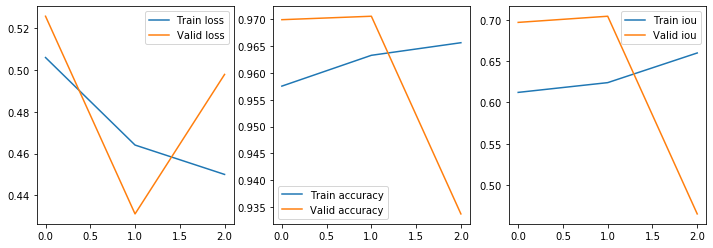

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256, 256, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [43]:
import csv
from skimage import measure


# load and shuffle filenames
folder = '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images'
test_filenames = os.listdir(folder)
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=16, image_size=256, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break
        
print("Done predicting...")

TypeError: print() takes 1 positional argument but 2 were given

In [44]:
# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission_val.csv')

NameError: name 'submission_dict' is not defined

In [45]:
ls

__notebook__.ipynb  model_val-0.51.h5


In [46]:
#----------------------------------------------------------------- RFCNN

from __future__ import division
import random
import pprint
import sys
import time
import numpy as np
#from optparse import OptionParser
import pickle

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Input
from keras.models import Model

import sys
sys.path.append('/kaggle/working/dt-keras-frcnn')

from keras_frcnn import config, data_generators
from keras_frcnn import losses as losses
import keras_frcnn.roi_helpers as roi_helpers
from keras.utils import generic_utils

train_path = 'annotate.txt'
parser = 'simple'

num_rois = 32
network = 'resnet50'
horizontal_flips = False
vertical_flips =  False
rot_90 = False
num_epochs = 2000
config_filename = "config.pickle"
output_weight_path = './model_frcnn.hdf5'
#input_weight_path =

train_path = 'annotate.txt'
parser = 'simple'

num_rois = 32
network = 'resnet50'
horizontal_flips = False
vertical_flips =  False
rot_90 = False
num_epochs = 2000
config_filename = "config.pickle"
output_weight_path = './model_frcnn.hdf5'
#input_weight_path =